# Preparing Time Series from Wide-Form Data

Nena Esaw

### Part 1

* First, you will prepare the dataset for time series analysis:
    * Load in the Zillow Home Value Index dataframe.
* Filter the 4 largest cities into a new dataframe.
    * Tip: the "SizeRank" column has already ranked the cities by size. The larger the city, the smaller the rank value.
        * Therefore the 4 largest cities would have rank values of [0,1,2,3]
* Melt the data to long-form and prepare it for time series analysis.
    * Convert the melted dates into datetime datatype.
    * Make the datetime column the index.
* Resample the dataframe as monthly frequency, grouped by City.

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)

In [7]:
#load the data 
df = pd.read_csv('Data/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


In [3]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [8]:
#filter the 4 largest cities into a new dataframe
cities = df[df['SizeRank'].isin([0,1,2,3])]
cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [9]:
#Melt the data to long-form and prepare it for time series analysis
melted = pd.melt(cities, id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
                                  'State', 'Metro', 'CountyName'],
                 var_name='Date', value_name='Price')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [10]:
#drop unncessary columns 
melted = melted.drop(columns=['CountyName','Metro','StateName','RegionID','RegionType','State','SizeRank'])
melted

,RegionName,Date,Price
0,New York,2000-01-31,253690.0
1,Los Angeles,2000-01-31,234181.0
2,Houston,2000-01-31,109068.0
3,Chicago,2000-01-31,166139.0
4,New York,2000-02-29,255517.0
...,...,...,...
1087,Chicago,2022-08-31,315587.0
1088,New York,2022-09-30,781622.0
1089,Los Angeles,2022-09-30,966595.0
1090,Houston,2022-09-30,272639.0


In [11]:
#Convert the melted dates into datetime datatype
melted['Date'] = pd.to_datetime(melted['Date'], format='%Y-%m-%d')
melted['Date']

0      2000-01-31
1      2000-01-31
2      2000-01-31
3      2000-01-31
4      2000-02-29
          ...    
1087   2022-08-31
1088   2022-09-30
1089   2022-09-30
1090   2022-09-30
1091   2022-09-30
Name: Date, Length: 1092, dtype: datetime64[ns]

In [12]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1092 non-null   object        
 1   Date        1092 non-null   datetime64[ns]
 2   Price       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.7+ KB


In [13]:
#Make the datetime column the index
melted = melted.set_index('Date')
melted

,RegionName,Price
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


In [24]:
#Resample the dataframe as monthly frequency, grouped by City
melted_rs = melted.groupby('RegionName').resample('MS').mean()
melted_rs

C:\Users\nena_\AppData\Local\Temp\ipykernel_9784\2582868103.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  melted_rs = melted.groupby('RegionName').resample('MS').mean()


Price
RegionName Date                
Chicago    2000-01-01  166139.0
           2000-02-01  166536.0
           2000-03-01  167368.0
           2000-04-01  168826.0
           2000-05-01  170499.0
...                         ...
New York   2022-05-01  768797.0
           2022-06-01  773944.0
           2022-07-01  777692.0
           2022-08-01  779960.0
           2022-09-01  781622.0

[1092 rows x 1 columns]

### Part 2

* Once you've prepared the dataframe with the time series data for the 4 largest cities:
    * Plot the home values for all 4 cities. (Hint: use unstack)
        * Make sure to add a title and axis labels.
        * Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc")
            * Hint: use the FuncFormatter from matplotlib.
* Answer the following 2 questions using pandas:
    * 1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?
        * Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex. 
* 2) How much did the home values change from November 2008 to December 2008 (in dollars)?
    * Hint: you can use .diff() to calculate the change in values

In [25]:
unstacked = melted_rs.unstack(level=0)
unstacked

Price                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [26]:
unstacked.columns

MultiIndex([('Price',     'Chicago'),
            ('Price',     'Houston'),
            ('Price', 'Los Angeles'),
            ('Price',    'New York')],
           names=[None, 'RegionName'])

In [19]:
import matplotlib.ticker as mticks


In [20]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

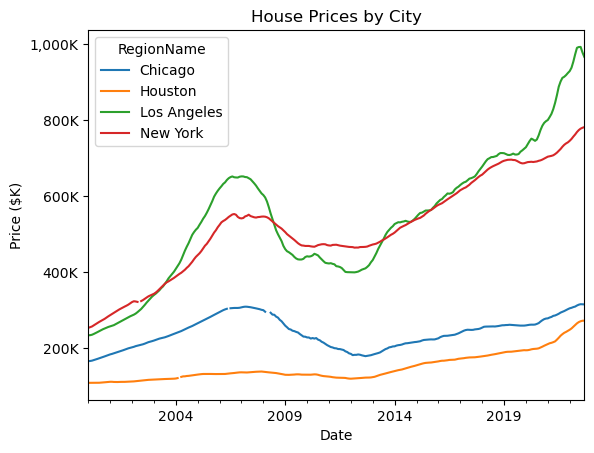

In [27]:
#Plot the data
ax = unstacked['Price'].plot()
ax.set(title = 'House Prices by City', ylabel = 'Price ($K)')
ax.yaxis.set_major_formatter(fmt_thous);

Which City had the highest Typical Home Value at the end of 2008? Which had the least?
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

In [31]:
max_price_2008 = melted_rs.loc[pd.IndexSlice[:, '12-2008'],:].idxmax()
max_price_2008

Price    (New York, 2008-12-01 00:00:00)
dtype: object

In [32]:
min_price_2008 = melted_rs.loc[pd.IndexSlice[:, '12-2008'],:].idxmin()
min_price_2008

Price    (Houston, 2008-12-01 00:00:00)
dtype: object

How much did the home values change from November 2008 to December 2008 (in dollars)?
Hint: you can use .diff() to calculate the change in values

In [84]:
ts_diff = diff_2008.diff()
ts_diff

Price                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-12-31 -5753.0  -964.0    -12611.0  -4458.0